In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 9.1 A Brief matplotlib API Primer

In [ ]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

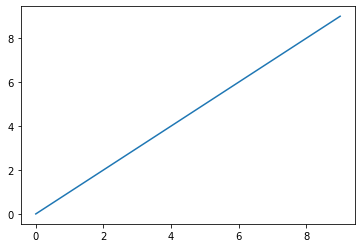

In [ ]:
# plot만 해주면 선을 그려준다!
plt.plot(data)

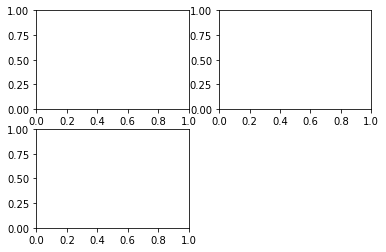

In [ ]:
# fig로 틀을 만들고, fig.add_subplot으로 틀 안에 그래프 창 만들기
# (2,2,1)은 2by2 그래프로 1번쨰 자리에!
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

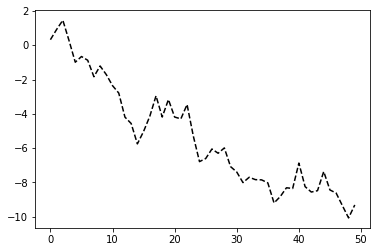

In [ ]:
# 그다음에 plot 그리면 가장 마지막 창에 그려짐
# k--는 black dashed line
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [ ]:
# 이렇게 위에서 subplot지정한거에 바로 그릴 수 있음
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

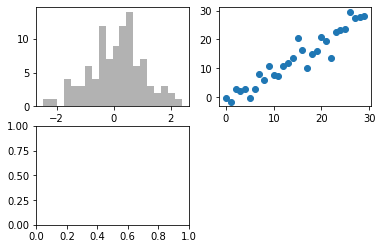

In [ ]:
fig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5778f66d0>,
      dtype=object)

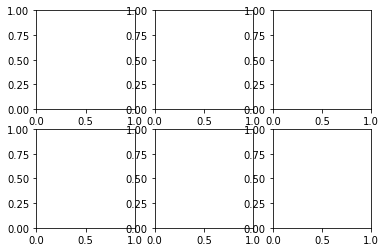

In [ ]:
# subplot으로 아예 여러 subplot 그릴 수 있음
# 얘네들은 axes[1,2]로 바로 호출 가능
fig, axes = plt.subplots(2, 3)
axes

In [ ]:
axes[1,2].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [ ]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5778f66d0>,
      dtype=object)

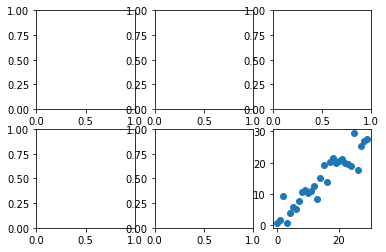

In [ ]:
fig

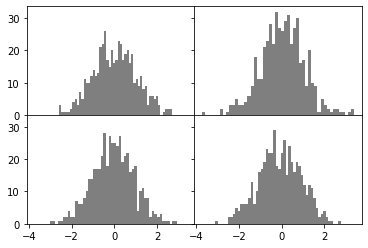

In [ ]:
# subplot 자체적으로 plot 간 간격을 두는데 이걸 조정할 수 있다
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) # 축 공유
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0) # 간격을 0으로!

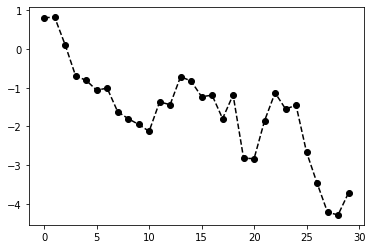

In [ ]:
# plot 안에 ko--로 표현(color가 k, marker가 o, dashed가 --)
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

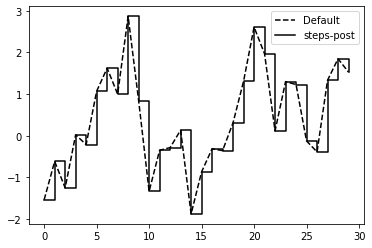

In [ ]:
# drawstyle로 stepwise한 그래프를 겹쳐 그림
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

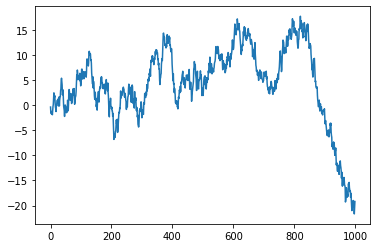

In [ ]:
# 그래프 꾸미기 by legend, label 등
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [ ]:
# tick은 x 눈금
# label은 지정. rotation으로 글자를 돌릴 수도!
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [ ]:
# 그림 제목이 set_title
# x label도 정할 수 있다
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

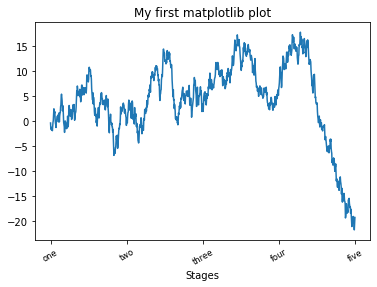

In [ ]:
fig

In [ ]:
# 이런식으로 dictionary로 만들고 한번에 set으로 바꿀 수 있음
props = { 
    'title': 'My first matplotlib plot', 'xlabel': 'Stages' 
} 
ax.set(**props)

[Text(0.5, 17.200000000000003, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

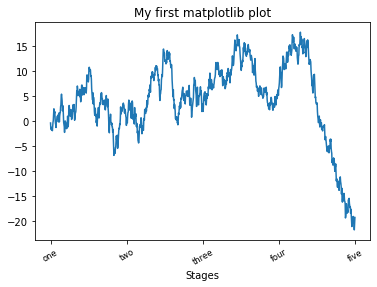

In [ ]:
fig

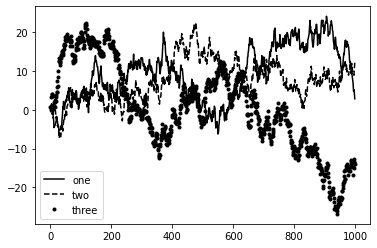

In [ ]:
# 애초에 legend를 이렇게 지정해놨으면, 그냥 나중에 ax.legend만 해주면 된다.
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best') # 제일 좋은 자리에 보여줌

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

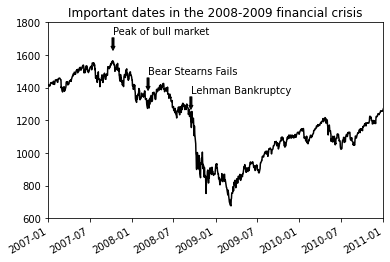

In [3]:
# 다른 특별한 표시를 할 수도 있다
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('/content/drive/MyDrive/pydata-book-2nd-edition/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), #가르키는 위치
                xytext=(date, spx.asof(date) + 225), # 텍스트 위치
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top') #화살표 위에, 화살표를 왼쪽에 두고!

# Zoom in on 2007-2010
# x축 y축 변경
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
# 이름 추가
ax.set_title('Important dates in the 2008-2009 financial crisis')

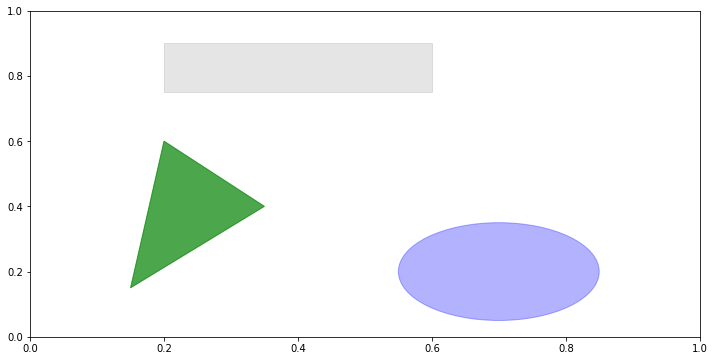

In [6]:
# 도형 그리기
# 도형 종류와 시작점, 가로 세로 등을 넣으면 된다.
# alpha는 투명도인듯
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.1)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.7)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [ ]:
# 그림파일 저장은 plt.savefig(~~.svg)로
# .pdf도 가능
#dpi: dots per inches 해상도
# bbox_inches="tight" 이런식으로 겉에 흰색 남는거 자를 수 있음

In [ ]:
# cunstomization
# plt.rc('바꾸려는거', 어떻게 바꿀지)
# ex 
# plt.rc('figure', figsize=(10, 10))
# 이렇게 dictionary로 해놓고 한방에 바꿀수도
# font_options = {'family' : 'monospace', 'weight' : 'bold', 'size' : 'small'} 
# plt.rc('font', **font_options)

# 6.2 Plotting with pandas and seaborn

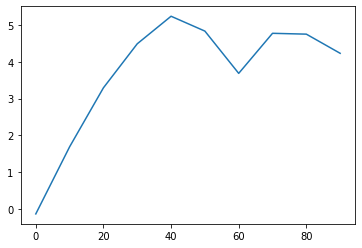

In [7]:
# Line Plots
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()


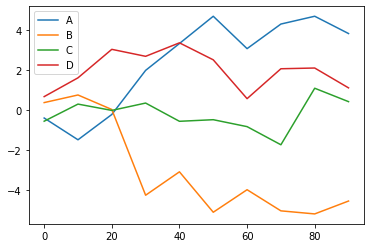

In [8]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

In [ ]:
# 여기에 넣을 수 있는 조건이 너무 많음
# alpha, xlim, xticks, subplots, sharex, legend, etc

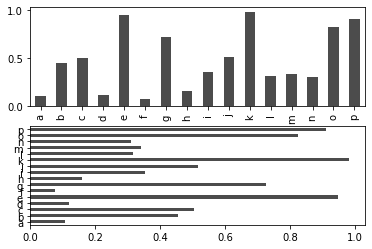

In [9]:
# bar plot
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [10]:
np.random.seed(12348)
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df


Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


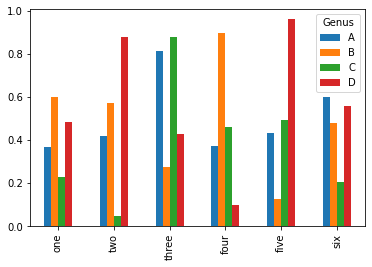

In [11]:
# 이름이 legend로 가네!
df.plot.bar()

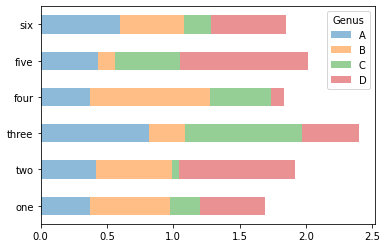

In [12]:
# 요런 모양도 가능
df.plot.barh(stacked=True, alpha=0.5)

In [13]:
tips = pd.read_csv('/content/drive/MyDrive/pydata-book-2nd-edition/examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [15]:
# 1, 6 사이즈 별로 없어서 없애기
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [17]:
# 요일 전체 합으로 나눠서 퍼센트화
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


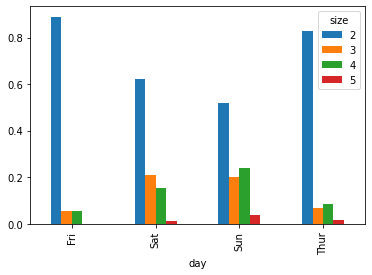

In [18]:
party_pcts.plot.bar()

In [20]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()


,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


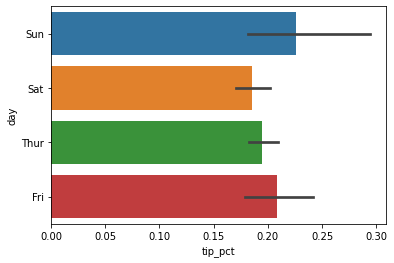

In [21]:
# seaborn을 이용하면 더 간단히!
# 막대는 그 요일의 tip_pict 평균
# 검정 막대는 95% conf. int.
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

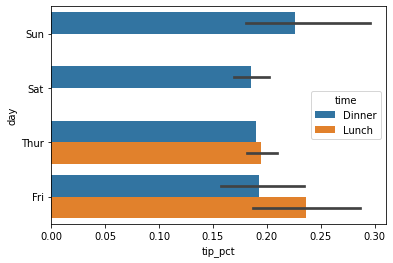

In [22]:
# hue로 또 한번 categorize
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

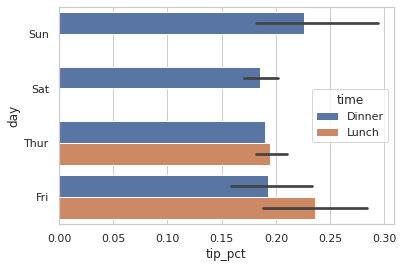

In [24]:
#색 변경
sns.set(style="whitegrid")
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

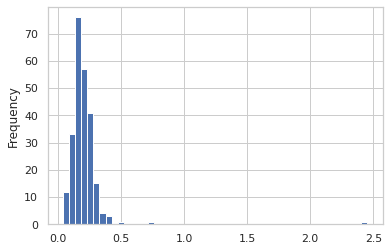

In [25]:
plt.figure()
tips['tip_pct'].plot.hist(bins=50)

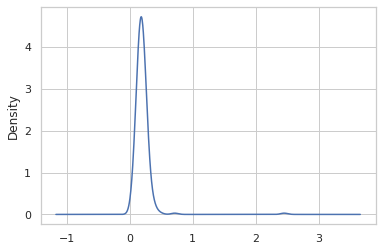

In [26]:
# 분포를 예측해서 그리자
tips['tip_pct'].plot.density()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


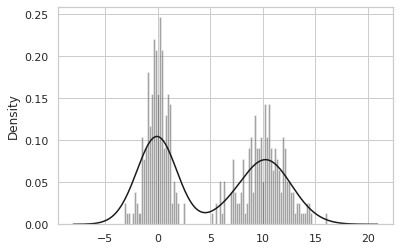

In [27]:
# seaborn distplot으로 한방에 그릴수도!
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

In [28]:
macro = pd.read_csv('/content/drive/MyDrive/pydata-book-2nd-edition/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna() # diff는 인접 수끼리 차이
trans_data[-5:]


,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

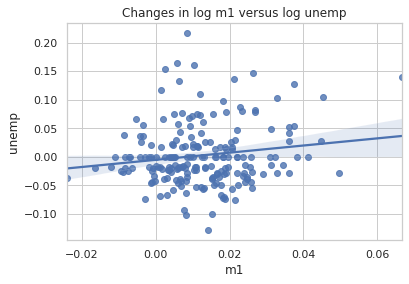

In [30]:
# 바로 회귀분석 가능 by regplot
plt.figure()
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

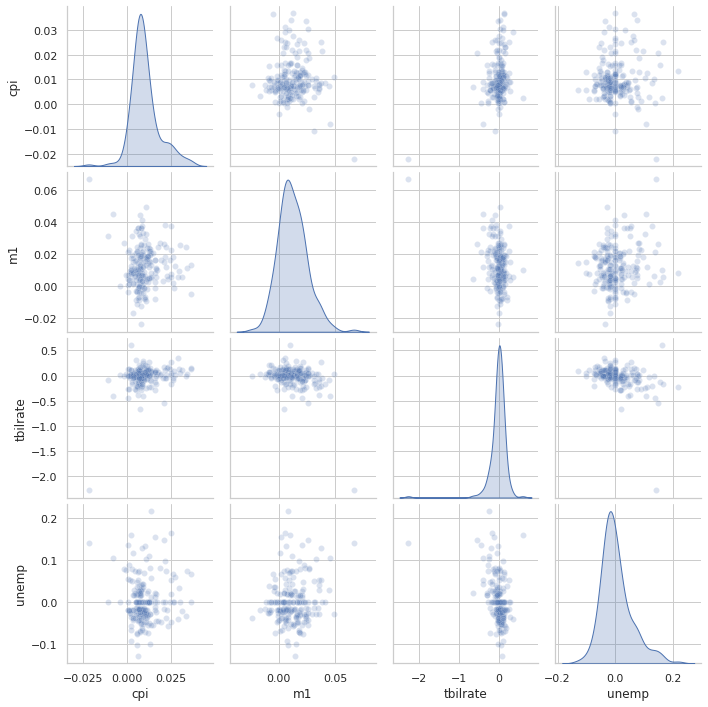

In [31]:
# 변수간 상관관계를 보기 쉬운 scatter matrix
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


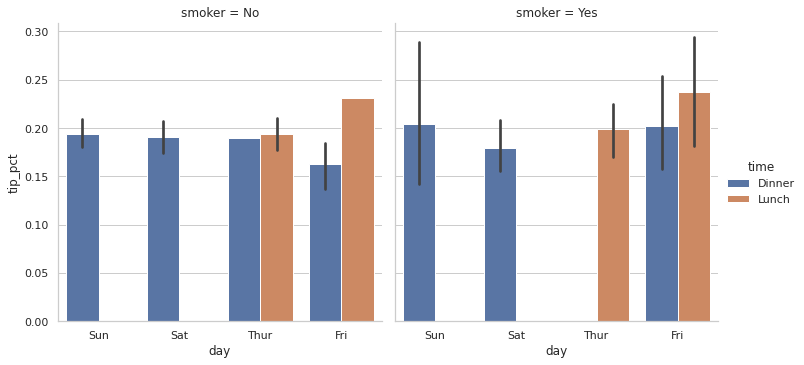

In [32]:
# facet grid를 factor plot으로 그리자
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


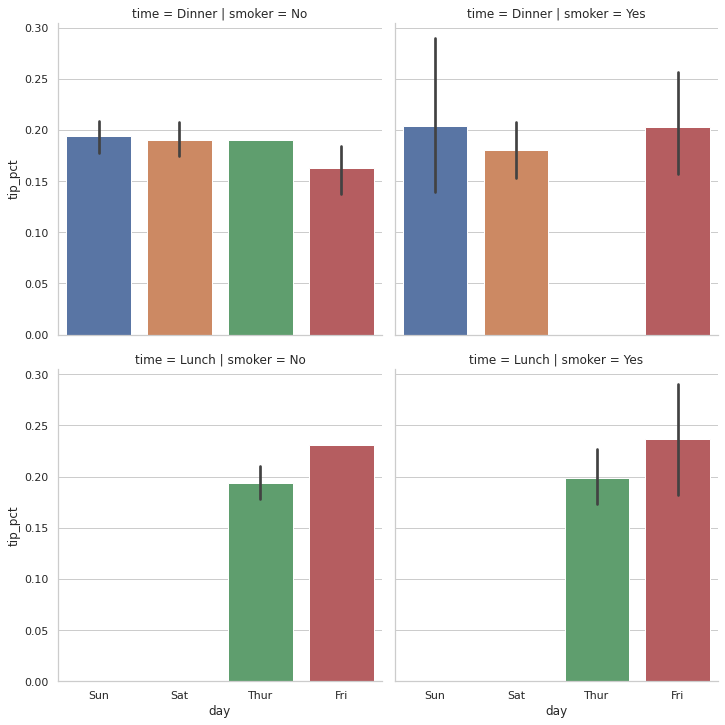

In [33]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


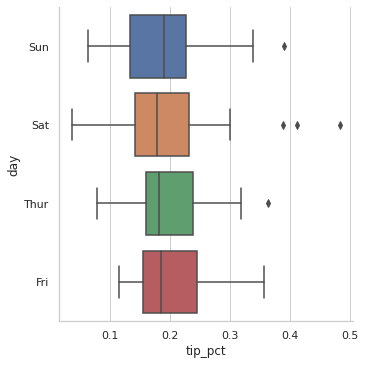

In [34]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])